# Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow

## Chapter 2: Housing Example

---

## Imports

In [1]:
import logging
from pathlib import Path
import sys
import tarfile
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split

## Configure Notebook

In [2]:
%matplotlib inline

logging.basicConfig(stream=sys.stdout)
logger = logging.getLogger('housing')
logger.setLevel(logging.DEBUG)

DATE = pd.to_datetime("today").date()

# Fonts
AXIS_FONT = {
    'color': 'gray',
    'family': 'Arial, sans-serif',
    'size': 18,
}

TICK_FONT = {
    'color': 'black',
    'family': 'Old Standard TT, serif',
    'size': 14,
}

TITLE_FONT = {
    'color': 'black',
    'family': 'Arial, sans-serif',
    'size': 24,
}

PARAMS = {
    'axes.labelsize': 14,
    'axes.titlesize': 20,
    'figure.titlesize': 24,
    'legend.fontsize': 12,
}
plt.rcParams.update(PARAMS)

---

## Download Data

In [3]:
FILE = 'housing.tgz'
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master'
HOUSING_URL = f'{DOWNLOAD_ROOT}/datasets/housing/{FILE}'
DATA_DIR = Path('../../data/')
DEST_FILE = DATA_DIR / FILE


def download_housing():
    """Download housing data."""
    DATA_DIR.mkdir(exist_ok=True)
    urllib.request.urlretrieve(HOUSING_URL, DEST_FILE)
    with tarfile.open(DEST_FILE, 'r') as f:
        f.extractall(DATA_DIR)
    logger.debug('Loaded data from URL: %s' % HOUSING_URL)
    logger.debug('Extracted %s to %s' % (DEST_FILE.name, DATA_DIR.resolve()))
    

download_housing()

DEBUG:housing:Loaded data from URL: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz
DEBUG:housing:Extracted housing.tgz to /usr/src/tensorflow_2/data


---

## Load Data

In [4]:
d = pd.read_csv(DEST_FILE.with_suffix('.csv'))
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
d.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
d.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
d['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. U

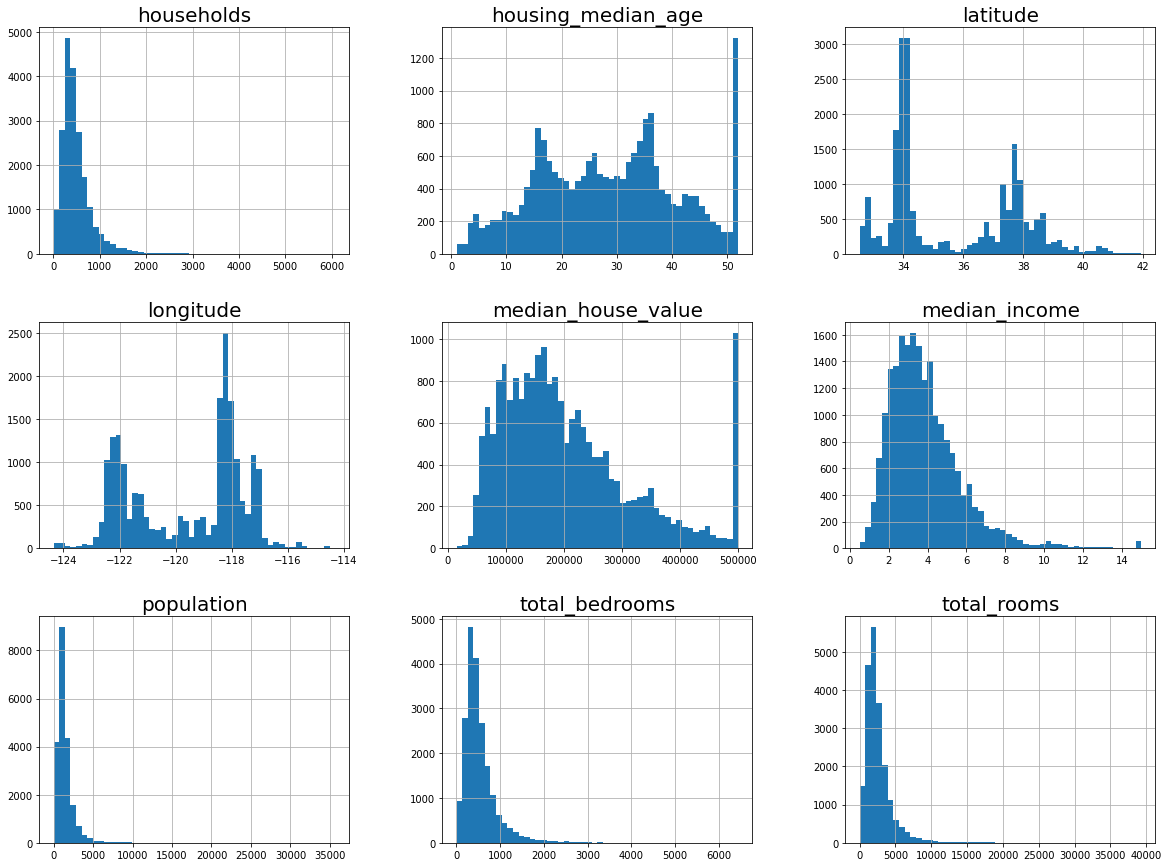

In [8]:
d.hist(bins=50, figsize=(20, 15))
plt.show()

---

## Split Dataset

**Assumptions:**

- The median income is a strong predictor of median house price.


**Processing Method**

- Batch Training
    - Any retraining will involve all the data so tracking the split is not required.
- Online Training
    - As long as each mini-batch was prepared with the same stratified split and no instances were repeated the data could be injested for training.
    - The training set would have to grow with each new load of data.

In [9]:
weights, bins = pd.qcut(d['median_income'], q=5, labels=range(5), retbins=True)

In [10]:
labels = 'median_house_value'
x_train, x_test, y_train, y_test = train_test_split(
    d.drop(labels, axis=1),
    d[labels],
    test_size=0.2,
    random_state=2,
    stratify=weights,
)

(pd.concat([x_train, y_train], axis=1)
 .to_pickle(DATA_DIR / f'housing_train-{DATE}.pickle'))
(pd.concat([x_test, y_test], axis=1)
 .to_pickle(DATA_DIR / f'housing_test-{DATE}.pickle'))

In [11]:
def error_diff(a: pd.Series, b: pd.Series) -> pd.Series:
    """Calculate the elementwise error difference between two series."""
    return (a - b) / b


distribution = pd.concat(
    [y_train.rename('train-median_income').describe(),
     y_test.rename('test-median_income').describe(),
     d['median_income'].rename('all_data-median_income').describe(),
    ],
    axis=1
)
distribution = distribution.join(
    distribution[['train-median_income', 'test-median_income']]
    .apply(lambda x: error_diff(x, distribution['all_data-median_income']))
    .rename(columns={'train-median_income': 'train-error',
                     'test-median_income': 'test-error'})
)
distribution

train-median_income  test-median_income  all_data-median_income  \
count         16512.000000         4128.000000            20640.000000   
mean         206700.275981       207477.980620                3.870671   
std          115141.310758       116419.243581                1.899822   
min           14999.000000        14999.000000                0.499900   
25%          119700.000000       119550.000000                2.563400   
50%          179700.000000       179750.000000                3.534800   
75%          264500.000000       266200.000000                4.743250   
max          500001.000000       500001.000000               15.000100   

        train-error    test-error  
count     -0.200000     -0.800000  
mean   53400.664938  53601.587372  
std    60605.376730  61278.036070  
min    30003.000800  30003.000800  
25%    46694.794648  46636.278614  
50%    50836.388254  50850.533326  
75%    55762.453328  56120.857376  
max    33332.177779  33332.177779

In [12]:
fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=d['median_income'],
        marker={'color': 'blue'},
        name='all data',
        opacity=0.7,
    )
)
fig.add_trace(
    go.Histogram(
        x=x_train['median_income'],
        marker={'color': 'darkgray'},
        name='train set',
        opacity=0.7,
    )
)
fig.add_trace(
    go.Histogram(
        x=x_test['median_income'],
        marker={'color': 'lightgray'},
        name='test set',
        opacity=0.7,
    )
)

fig.update_layout({
    'barmode': 'overlay',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'title': {
        'font': TITLE_FONT,
        'text': 'Median Income Distributions',
        'x': 0.05,
        'y': 0.90,
    },
    'xaxis': {
        'side': 'bottom',
        'tickangle': -45,
        'tickfont': TICK_FONT,
        'title': 'Median Income ($10k)',
        'titlefont': AXIS_FONT,
    },
    'yaxis': {
        'tickangle': 0,
        'tickfont': TICK_FONT,
        'title': 'Count',
        'titlefont': AXIS_FONT,
    },
})
iplot(fig, 'Median Income Distributions')

---

## Map Housing Prices

In [47]:
fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        hoverinfo='lat+lon+text' ,
        hovertemplate=("longitude: %{lon}<br>"
                       + "latitude: %{lat}<br>"
                       + "median house value: %{text}"
                      ),
        lon=x_train['longitude'],
        lat=x_train['latitude'],
        marker = {
            'color': y_train,
            'colorbar': {
                'title': {
                    'font': AXIS_FONT,
                    'text': 'Median house value',
                },
            },
            'colorscale': 'Jet',
            'showscale': True,
            'size': x_train['population'] / 100,
            'sizemin': 7,
            'opacity': 0.4,
        },
        mode='markers',
        name='',
        text=y_train,
    )
)

fig.update_layout({
    'width': 1000,
    'height': 1000,
    'margin': {'l':0, 'b': 0},
    'mapbox': {
        'center': {'lat': 37, 'lon': -119.5},
        'style': 'stamen-terrain',
        'zoom': 5.5,
    },
    'title': {
        'font': TITLE_FONT,
        'text': 'California Housing Prices',
        'x': 0.02,
        'y': 0.95,
    },
    'annotations': [{
        'text': 'Marker size proportional to population density',
        'font': AXIS_FONT,
        'showarrow': False,
        'x': 1,
        'y': 1.03,
        'xanchor': 'right',
    }],
})
iplot(fig, 'Median Income Map')